In [1]:
import jax
jax.config.update("jax_enable_x64", True)

import h5py
import numpy as np
import scipy.optimize
import jax.numpy as jnp

import ultraplot as uplt

In [2]:
from garys_Tz import Tz
from scipy.interpolate import InterpolatedUnivariateSpline

In [151]:
dz = 0.05
z0 = 0.01 + dz/2
x = np.arange(0.01, 0.81 - dz/2, dz) + dz / 2
print(x[-1])
x = np.concatenate([[0.0], x])
y = np.abs(np.sin(x * 10))
ytz = y / np.sum(y)
# y[1] = y[1] / (0.06)
# y[2:] = y[2:] / (0.05)
yspl = y.copy()
# nrm = yspl[1] * 0.06 + 0.05 * np.sum(yspl[2:])
# yspl = y / nrm
# yspl[1] = yspl[1] * 0.06 / 0.05
#
ynrm = np.sum(yspl)
yspl[1] = yspl[1] / ((z0 + dz) / 2) / ynrm
yspl[2:] = yspl[2:] / 0.05 / ynrm
yspl = np.concatenate([yspl, [0.0]])
xspl = np.concatenate([x, [x.max() + dz]])

spl = InterpolatedUnivariateSpline(xspl, yspl, k=1, ext=1)
def _quad_spl(a, b):
    return spl.integral(a, b)

def _func_spl(a):
    return spl(a)

tz = Tz(dz, y[1:].shape[0], z0=z0)
def _func_tz(a):
    return tz.dndz(ytz[1:], a)


0.785


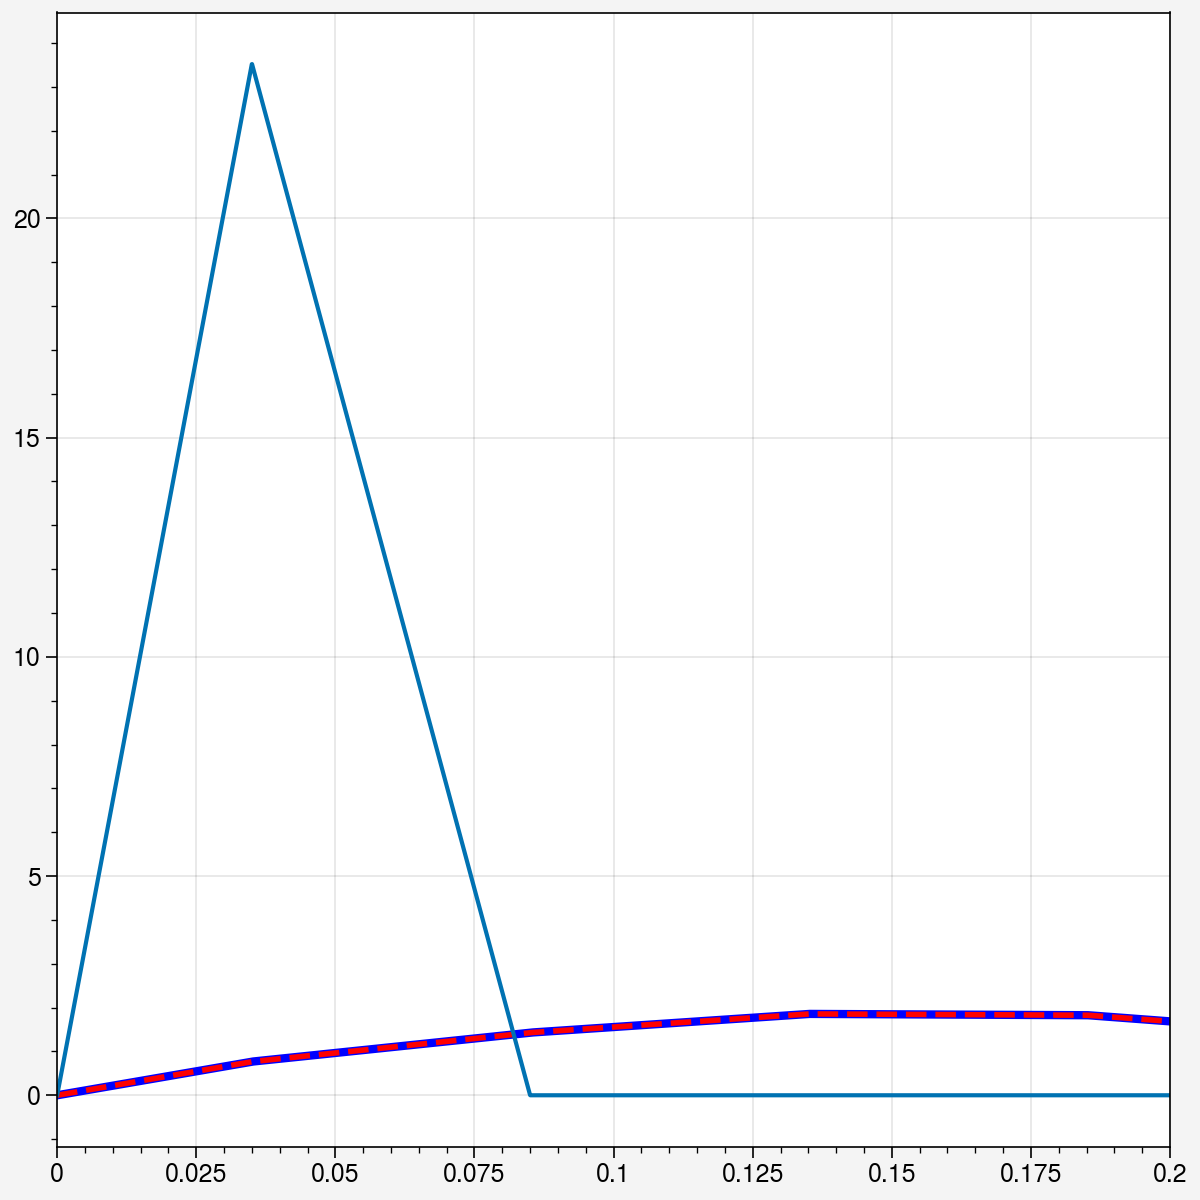

In [152]:
xp = np.linspace(-2, 2, 100000)
fig, axs = uplt.subplots(figsize=(6, 6))

axs.plot(xp, _func_spl(xp), "-", color="blue", lw=3)
# axs.plot(x, yspl, "o", color="blue")
axs.plot(xp, _func_tz(xp), "--", color="red", lw=2)
# axs.plot(x, ytz / 0.05, "o", color="red")
axs.plot(xp, tz(0, xp))
# axs.plot(xp, tz(15, xp)*0.05)
axs.format(xlim=(0.0, 0.2))

In [128]:
x.shape

(17,)

In [116]:
y[-1]

0.0047779425901285115

In [140]:
from des_y6_nz_modeling import GMODEL_COSMOS, ZVALS

In [143]:
ZVALS.shape, GMODEL_COSMOS.shape

((61,), (61,))

In [154]:
0.01 + 0.05/2

0.035